In [24]:
import numpy as np
from bs4 import BeautifulSoup
import os
import re
import seaborn as sns

In [7]:
def keep_arabic_text(text):
    
    arabic_pattern = re.compile('[\u0600-\u06FF\s!؟]+')
    arabic_text = re.findall(arabic_pattern, text)
    arabic_text = ' '.join(arabic_text)
    arabic_text = re.sub(r'[\xa0]', '', arabic_text)
    
    return arabic_text

In [8]:
reader = open('antcorpus.data-1.1/culture/JA-culture-2-20170113.txt', 'r', encoding='utf8')
text = reader.read()
text

'<DOC>\n<DOCNO>JA-culture-2-20170113</DOCNO>\n<URL>http://www.jawharafm.net/ar/article/تجربة-مستثمر-تونسي-اختار-تشييد-قاعة-سينما-رغم-الصعوبات/95/75751</URL> \n<SRC>Jawhara FM</SRC>\n<CAT>culture</CAT>\n<TITLE>تجربة مستثمر تونسي اختار تشييد قاعة سينما رغم الصعوبات</TITLE>\n<TIME>2017-01-13T18:51:00+01:00</TIME>\n<ABSTRACT>\nاستضاف برنامج سينما سينما، أمس الخميس 12 جانفي 2017، مروان بديرة الفيلالي، باعث مشروع قاعة سينما خاصة بمدينة منزل تميم من ولاية نابل، للحديث حول تجربته الفريدة في الاستثمار في المجال الثقافي.\n</ABSTRACT>\n<TEXT>\nاستضاف برنامج سينما سينما، أمس الخميس 12 جانفي 2017، مروان بديرة الفيلالي، باعث مشروع قاعة سينما خاصة بمدينة منزل تميم من ولاية نابل، للحديث حول تجربته الفريدة في الاستثمار في المجال الثقافي.\nوأكدّ الفيلالي، أنّ القاعة التي دشنّها نهاية شهر ديسمبر الماضي، بطاقة استيعاب تبلغ 100 متفرج، تشهد إقبالا جماهيريا محترما من مختلف الفئات العمرية ومن الجنسين، بفضل العروض المتنوعة والحديثة المقدّمة في هذه القاعة، إضافة إلى عرض أفلام بتقنيات ثلاثية الأبعاد. وأشار الفيل

In [9]:
soup = BeautifulSoup(text, 'html.parser')
text = soup.get_text(strip = True)
text = keep_arabic_text(text)
text

'تجربة مستثمر تونسي اختار تشييد قاعة سينما رغم الصعوبات   تجربة مستثمر تونسي اختار تشييد قاعة سينما رغم الصعوبات استضاف برنامج سينما سينما، أمس الخميس   جانفي  ، مروان بديرة الفيلالي، باعث مشروع قاعة سينما خاصة بمدينة منزل تميم من ولاية نابل، للحديث حول تجربته الفريدة في الاستثمار في المجال الثقافي استضاف برنامج سينما سينما، أمس الخميس   جانفي  ، مروان بديرة الفيلالي، باعث مشروع قاعة سينما خاصة بمدينة منزل تميم من ولاية نابل، للحديث حول تجربته الفريدة في الاستثمار في المجال الثقافي \nوأكدّ الفيلالي، أنّ القاعة التي دشنّها نهاية شهر ديسمبر الماضي، بطاقة استيعاب تبلغ   متفرج، تشهد إقبالا جماهيريا محترما من مختلف الفئات العمرية ومن الجنسين، بفضل العروض المتنوعة والحديثة المقدّمة في هذه القاعة، إضافة إلى عرض أفلام بتقنيات ثلاثية الأبعاد  وأشار الفيلالي إلى أنّ خوضه هذه التجربة، كان بمثابة تحدٍّ طالما راود مخيلته، وأصرّ على تحقيقه، إلى أن تحوّل الأمر إلى واقع رغم الصعوبات التي واجهته، وفي ظل حالة الاختناق التي يعيشها المشهد الثقافي التونسي عموما، وقطاع السينما بصفة خاصة  الفيلالي، دعا وزارة

In [10]:
with open('allcorpus.txt', 'a',encoding='utf8', newline='') as writer:
    for dir in os.listdir('antcorpus.data-1.1'):
        for file in os.listdir(os.path.join('antcorpus.data-1.1', dir)):
            path = os.path.join('antcorpus.data-1.1', dir, file)
            reader = open(path, 'r', encoding='utf8')
            text = reader.read()
            soup = BeautifulSoup(text, 'html.parser')
            text = soup.get_text(strip = True)
            text = keep_arabic_text(text)
            reader.close()
            writer.write(text + '\n')

In [31]:
all_text = []
c = 0
for r in open('allcorpus.txt', 'r', encoding='utf8'):
    if len(r) == 1:
        c += 1
    all_text.append(r)
print(c)

58


In [32]:
print(len(all_text))

21372


In [42]:
all_text = [para for para in all_text if len(para.split())!=0]
all_lens_chars = [len(para) for para in all_text]
all_lens_word = [len(para.split()) for para in all_text]
mean_words_count = np.mean(all_lens_word)
mean_chars_count = np.mean(all_lens_chars)
mean_words_count, mean_chars_count

(63.840035662334, 387.80005630894846)

C:\Users\bebog\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


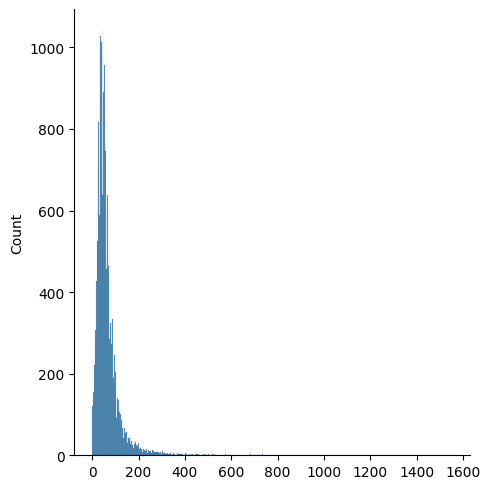

In [48]:
sns.displot(all_lens_word, kde = None);

C:\Users\bebog\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


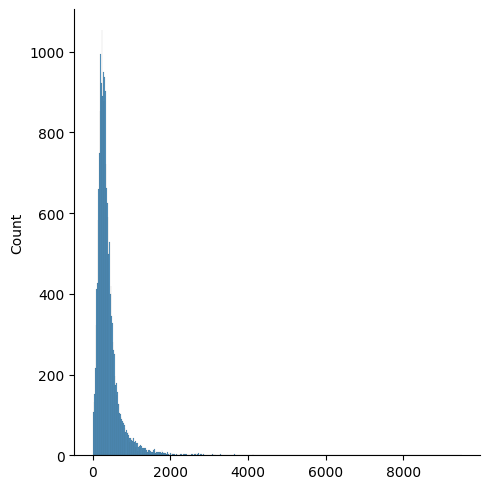

In [49]:
sns.displot(all_lens_chars, kde = None);